### A bike-sharing system: 
It is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
bike_share = pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding

#### Data Dictionary:

###### day.csv have the following fields:
	
* instant: record index
* dteday : date
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : temperature in Celsius
* atemp: feeling temperature in Celsius
* hum: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [3]:
# Checking the shape of dataframe
bike_share.shape

(730, 16)

Dataset has 730 rows and 16 columns

In [4]:
# Checking the descriptive statistics
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking the descriptive information
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* From descriptive statistics, it is observed that except one column, other columns are either float (4 columns) or integer type (11 columns). Only one column is date type (object).
* But from the data dictionary, it can be understood that some fields that are categorical in nature, but are in integer type, like season, month, weekday and weathersit. Such columns need to be analysed and if required they need to be converted to categorical type.

### Data quality checks

##### Checking for missing values and duplicates

In [6]:
# Checking for missing/null values in dataset
print(bike_share.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


* Missing values are not present either in columns or rows

In [7]:
# Checking for duplicates and dropping the entire duplicate row if any
bike_share.drop_duplicates(subset=None, inplace=True)
bike_share.shape

(730, 16)

* There are no duplicate values in dataset

In [8]:
# Checking value_counts() for all the columns, to identify to redundant or unknown values are present in the dataset.
for col in bike_share:
    print(bike_share[col].value_counts(), '\n')

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64 

24-06-2018    1
04-12-2019    1
02-11-2019    1
28-02-2019    1
01-08-2019    1
             ..
10-08-2019    1
30-07-2019    1
12-10-2018    1
19-12-2018    1
10-06-2018    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847 

* From value counts results dataset appears to be fine.
* Significant Outliers are not present in the dataset. 

#### Dropping Columns that doesn't add value to our objective

Considering the objective and the dataset understanding, it can be concluded that few predictor variables can be removed for further analysis:

* instant : It is not a feature contributing to the demand and can be safely removed.

* dteday : Seperate columns for 'year', 'month', 'weekday', ,working day' and 'holiday' are present in the dataset, hence, dteday can be safely dropped.

* casual & registered : Addition of these two columns is equal to count of demand (which is our target variable), hence if these are present in dataframe then linear model would be based on these two columns merely, ignoring other important features. So these must be dropped. Further, our objective is to find total count of bikes, and by pecific category, so these columns can be safely dropped.


In [9]:
bike_share.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


### Exploratory Data Analysis

#### Encoding Categorical Columns

* Convert season, weathersit, mnth and weekday to categorical types

In [10]:
bike_share.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
print(bike_share.season.value_counts())
bike_share.weathersit.replace({1:'clear',2:'misty',3:'light_snow',4:'heavy_rain'},inplace = True)
print(bike_share.weathersit.value_counts())
bike_share.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)
print(bike_share.mnth.value_counts())
bike_share.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)
print(bike_share.weekday.value_counts())
bike_share.head()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
clear         463
misty         246
light_snow     21
Name: weathersit, dtype: int64
aug     62
jul     62
oct     62
may     62
jan     62
mar     62
dec     62
apr     60
nov     60
jun     60
sept    60
feb     56
Name: mnth, dtype: int64
sun    105
mon    105
sat    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing Categorical Variables

##### Building boxplot of categorical variables againt the target variable (before creating dummies) to see effects of predictor variable on target variable.

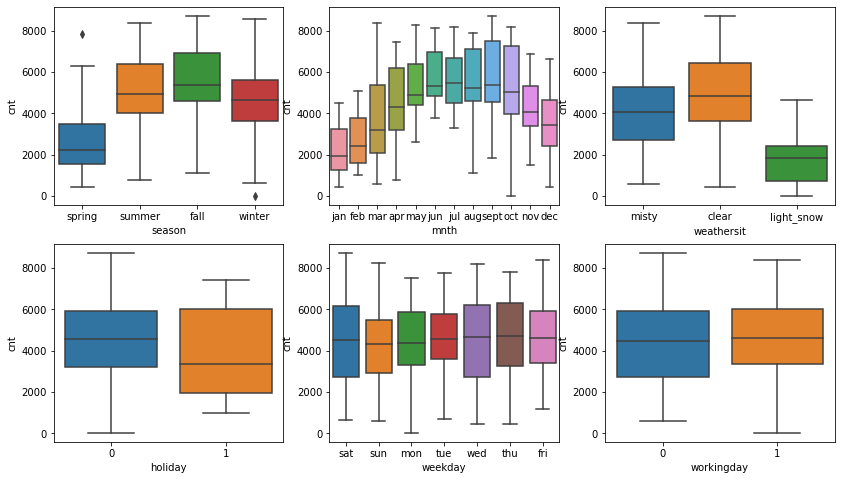

In [11]:
plt.figure(figsize=(14, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.show()

Insights:
* **season**: Maximum bike bookings were seen in fall season. This was followed by summer & winter. This indicates, season can be a good predictor variable. 
* **mnth**: More bike bookings were happening in the months Jun,Jul,Aug, Sep and Oct7 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor variable. 
* **weathersit**: Majority of the bike bookings were seen during clear weather , which was followed by misty weather. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor variable. 
* **holiday**: bike bookings were more when it is not a holiday which indicates that holiday might not be a good predictor variable. 
* **weekday**: weekday variable shows very close trend, hence, this variable may have some or no influence.
* **workingday**: working day shows close trend, hence, this variable may have some or no influence.

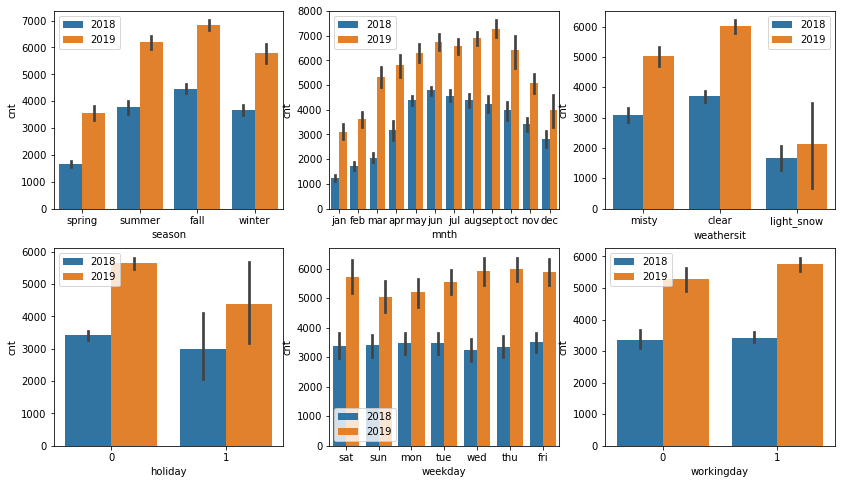

In [12]:
# Checking the impact of year against the categorical variable : 

plt.figure(figsize=(14, 8))
plt.subplot(2,3,1)
ax = sns.barplot(x = 'season', y = 'cnt', data = bike_share, hue='yr')
h,l = ax.get_legend_handles_labels()
labels=['2018', '2019']
ax.legend(h,labels) 
plt.subplot(2,3,2)
ax = sns.barplot(x = 'mnth', y = 'cnt', data = bike_share, hue='yr')
h,l = ax.get_legend_handles_labels()
labels=['2018', '2019']
ax.legend(h,labels) 
plt.subplot(2,3,3)
ax = sns.barplot(x ='weathersit', y = 'cnt', data = bike_share, hue='yr')
h,l = ax.get_legend_handles_labels()
labels=['2018', '2019']
ax.legend(h,labels) 
plt.subplot(2,3,4)
ax = sns.barplot(x ='holiday', y = 'cnt', data = bike_share, hue='yr')
h,l = ax.get_legend_handles_labels()
labels=['2018', '2019']
ax.legend(h,labels) 
plt.subplot(2,3,5)
ax = sns.barplot(x = 'weekday', y = 'cnt', data = bike_share, hue='yr')
h,l = ax.get_legend_handles_labels()
labels=['2018', '2019']
ax.legend(h,labels) 
plt.subplot(2,3,6)
ax = sns.barplot(x = 'workingday', y = 'cnt', data = bike_share, hue='yr')
h,l = ax.get_legend_handles_labels()
labels=['2018', '2019']
ax.legend(h,labels) 
plt.show()

* It is observed that there is significant increase in the cnt in the year 2019 with respect to all the categorical variables. so year can be a good predictor variable.

### Visualizing Continuous Numeric Variables

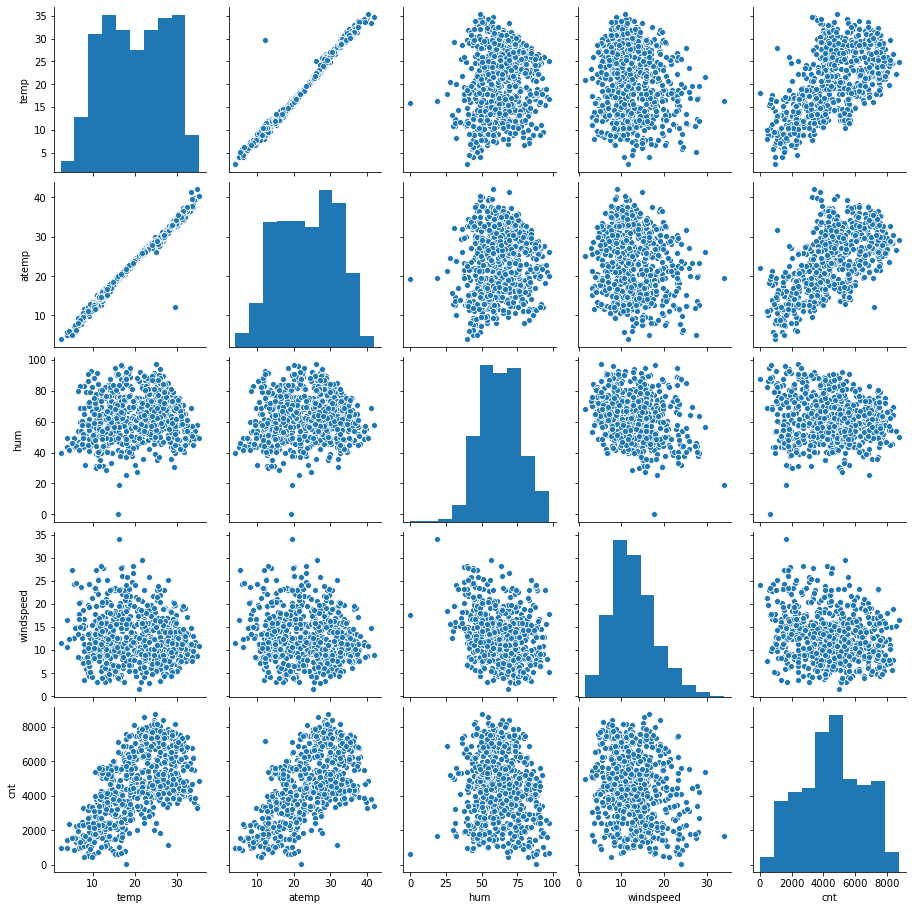

In [13]:
# Generating pairplot to check the relationships between numeric variables
bike_numeric = bike_share[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_numeric)
plt.show()

* Pair-Plot shows strong linear relationship between 'temp' and 'atemp'. Hence, both parameters cant be used for model building due to multicolinearity. 
* Linear Relationship is observed between count and temp, atemp

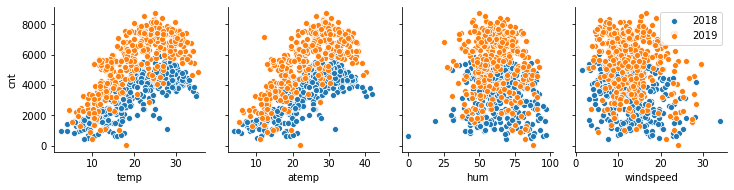

In [14]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike_share, hue='yr')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

* Similar to all categorical variables, for all the numeric variables as well, count has increased in 2019 when compared to 2018. 
* Thus year can be a key parameter in the model.

### Preparing the data
Encoding of categorical variables involves 
* Binary categorical to 1 and 0
* Other categorical to dummy variables

Following categorical variables do not require creation of dummy variables
* yr : year (0: 2018, 1:2019)
* holiday : weather day is a holiday (1) or not (0)
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0

Other categorical variables need to be converted into categorical values first (as it is int type which seen above in their value_count) and then dummy variables can be created using one-hot encoding.

#### Creation of dummy variables for predictor variables 'season', 'mnth', 'weekday' and 'weathersit'

In [15]:
# Convert categorical variables from 'numeric' to 'category' data type, for creation of dummy variables.
bike_share['season']=bike_share['season'].astype('category')
bike_share['mnth']=bike_share['mnth'].astype('category')
bike_share['weekday']=bike_share['weekday'].astype('category')
bike_share['weathersit']=bike_share['weathersit'].astype('category')
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 75.2 KB


In [16]:
# # Let's drop the first column from status df using 'drop_first = True'
bike_share = pd.get_dummies(bike_share, drop_first=True)

bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_aug               730 non-null    uint8  
 12  mnth_dec               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

In [18]:
bike_share.shape

(730, 30)

### Splitting the Data into Training and Testing Sets

In [19]:
# We specify random_state so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.shape

(510, 30)

In [21]:
df_test.shape

(219, 30)

### Correlation using HeatMap

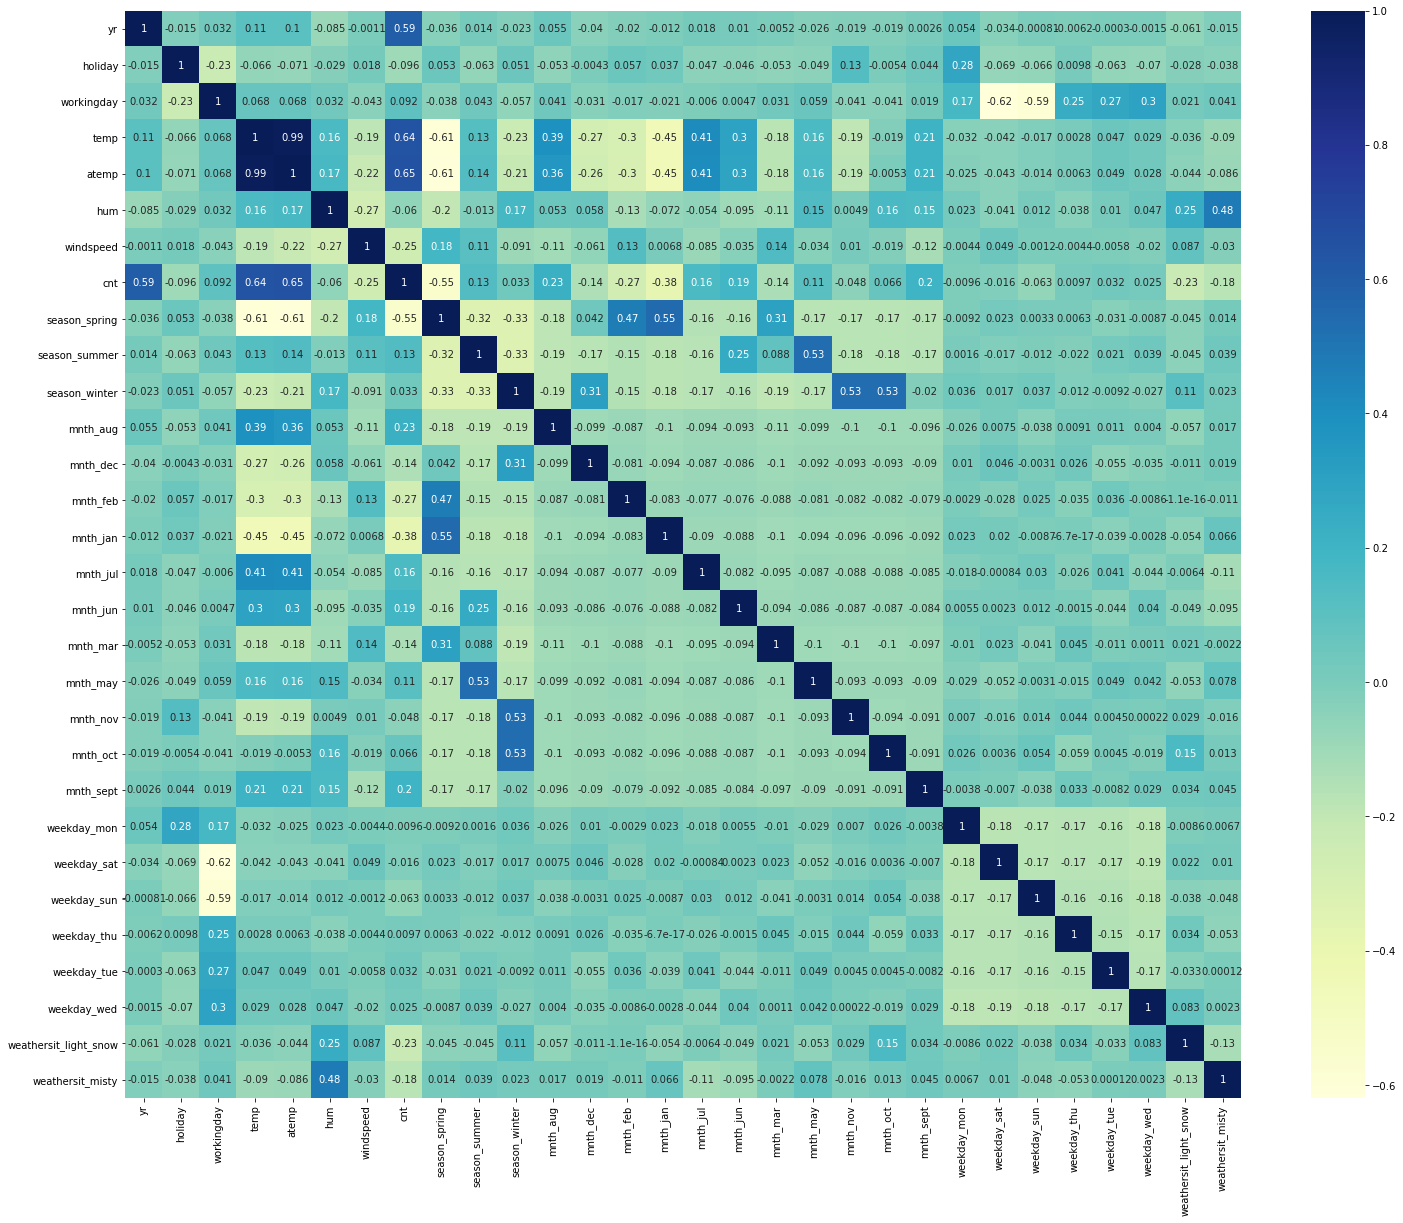

In [22]:
# Checking correlation coefficients to see highly correlated variables

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Correlation heatmap clearly shows which all variable are multicollinear in nature. Some deductions are
* Temp and atemp are highly correlated with correaltion value of 0.99. This implies only one of these variables can be used in the model.
* Working day has high negative correlation with saturday and sunday
* Further cnt have substantially high correlation with yr temp and atemp.
* Months and corresponding season has correlation

### Rescaling the Features
In multiple linear regression, rescaling is mandated for easy interpretation of coefficients. Different variables must be at comparable scale, so that coefficients obtained by fitting the regression model can be comparable during model evaluation. 

Further, if the various variables are in the range of 0 and 1, then the optimization is much faster, as gradient descent algorithm running for minimization of cost function

Rescaling can be done using

* MinMax Scaling (Normalization) ( between 0 and 1) ----(X - Xmin)/(Xmax - Xmin)
* Standardization (mean 0 and std 1) ----(X-mu)/sigma

In [23]:
# MinMaxScaler takes care of outliers as it compresses between (0-1) so preferred mostly
# Instantiate an object
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building Model
* We are building model using LinearRegression Function from SciKitLearn for its compatibility with RFE (which is utility from SkLearn)
* We are using RFE for feature selection as number of features are more than 20.

##### Recursive Feature Elimination (RFE)- Automated Approach

In [27]:
# Running RFE with the output number of the variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,15)     # Running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 5),
 ('mnth_mar', False, 10),
 ('mnth_may', False, 15),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_light_snow', True, 1),
 ('weathersit_misty', True, 1)]

In [29]:
# storing 15 variables as selected by RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_light_snow',
       'weathersit_misty'],
      dtype='object')

In [30]:
# Checking the columns that are eliminated
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building Model using statsmodel for detailed statistics

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

##### Mannual Model Development

In [32]:
# Adding Constant Variable
import statsmodels.api as sm
X_train_new1 = sm.add_constant(X_train_rfe)

In [33]:
# Running the first fitted model
lr1 = sm.OLS(y_train, X_train_new1).fit()

In [34]:
# Checking Summary of our Linear Model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.31e-191
Time:                        09:40:13   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

* mnth_jan is insignificant in presence of other variables, high p-value, hence can be dropped.

In [35]:
X_train_new2 = X_train_new1.drop(['mnth_jan'], axis =1)

#### Rebuilding the model without mnth_jan

In [36]:
# Adding Constant Variable
import statsmodels.api as sm
X_train_new2 = sm.add_constant(X_train_new2)

In [37]:
# Running the second fitted model
lr2 = sm.OLS(y_train, X_train_new2).fit()

* Supplement p-values with VIF to decide which variables should be dropped

In [38]:
# Checking Summary of our Linear Model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.13e-191
Time:                        09:40:50   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [39]:
## Calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,82.34
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.61
5,hum,1.91
3,workingday,1.88
12,weekday_sat,1.78
14,weathersit_misty,1.57
10,mnth_jul,1.49


* season_spring have high VIF, more than 5, hence can be dropped.

In [40]:
X_train_new3 = X_train_new2.drop(['season_spring'], axis =1)

#### Rebuilding the model without mnth_jan and season_spring

In [41]:
# Adding Constant Variable
import statsmodels.api as sm
X_train_new3 = sm.add_constant(X_train_new3)

# Running the second fitted model
lr3 = sm.OLS(y_train, X_train_new3).fit()

# Checking Summary of our Linear Model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.77e-191
Time:                        09:41:12   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [42]:
## Calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,52.63
5,hum,1.89
3,workingday,1.88
11,weekday_sat,1.78
4,temp,1.60
13,weathersit_misty,1.56
9,mnth_jul,1.43
7,season_summer,1.33
8,season_winter,1.29
12,weathersit_light_snow,1.24


All the predictor variables have good VIF and significantly lower p-values expect 'holiday' and 'mnth_jul'

In [43]:
X_train_new4 = X_train_new3.drop(['holiday'], axis =1)

#### Rebuilding the model without mnth_jan, season_spring and holiday

In [44]:
# Adding Constant Variable
import statsmodels.api as sm
X_train_new4 = sm.add_constant(X_train_new4)

# Running the second fitted model
lr4 = sm.OLS(y_train, X_train_new4).fit()

# Checking Summary of our Linear Model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.26e-191
Time:                        09:41:33   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

* All the predictor variables have significantly lower p-values expect mnth_jul

In [45]:
## Calculating VIF for feature variables

vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
10,weekday_sat,1.64
3,temp,1.60
12,weathersit_misty,1.56
8,mnth_jul,1.43
6,season_summer,1.33
7,season_winter,1.29
11,weathersit_light_snow,1.24


* All the predictor variables have good VIF and significantly lower p-values expect 'mnth_jul'

In [46]:
X_train_new5 = X_train_new4.drop(['mnth_jul'], axis =1)

In [47]:
# Adding Constant Variable
import statsmodels.api as sm
X_train_new5 = sm.add_constant(X_train_new5)

# Running the second fitted model
lr5 = sm.OLS(y_train, X_train_new5).fit()

# Checking Summary of our Linear Model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.89e-191
Time:                        09:41:52   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [48]:
## Calculating VIF for feature variables

vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,weekday_sat,1.64
11,weathersit_misty,1.56
3,temp,1.27
7,season_winter,1.25
10,weathersit_light_snow,1.24
6,season_summer,1.19
5,windspeed,1.18


* From the VIF calculation we could find that there insignificant multicollinearity existing between the predictor variables.
* The model obtained appears fine, as for all the predictor variables, p-values are very low. 
* Further, Probability of F-statistics is very low
* Hence, We will consider this as our final model and check if Test data metrics are significantly close to the final model metrics.

### Interpretation of Co-effcients of final model

* **const** : The Constant value of ‘0.1698’ indicated that, in the absence of all other predictor variables , The bike demand can still increase by 0.1698 units
* **yr** : A coefficient value of ‘0.2294’ indicated that a unit increase in yr variable, increases the bike demand by 0.2294 units
* **workingday** : A coefficient value of ‘0.0536’ indicated that, a unit increase in workingday variable increases the bike demand by 0.0536 units
* **temp** : A coefficient value of ‘0.5709’ indicated that a unit increase in temp variable, increases the bike demand by 0.5709 units
* **hum** : A coefficient value of ‘-0.1613’ indicated that, a unit increase in hum variable decreases the bike demand by 0.1613 units
* **windspeed** : A coefficient value of ‘-0.1861’ indicated that, a unit increase in windspeed variable decreases the bike demand by 0.1861 units
* **season_summer** : A coefficient value of ‘0.0899’ indicated that a unit increase in season_summer variable increases the bike demand by 0.0899 units
* **season_winter** : A coefficient value of ‘0.1407’ indicated that a unit increase in season_winter variable increases the bike demand by 0.1487 units
* **mnth_sept** : A coefficient value of ‘0.1025’ indicated that a unit increase in mnth_sept variable increases the bike demand by 0.1025 units
* **weekday_sat** : A coefficient value of ‘0.0630’ indicated that a unit increase in weekday_sat variable increases the bike demand by 0.0630 units
* **weathersit_light_snow** : A coefficient value of ‘-0.2439’ indicated that, a unit increase in weathersit_light_snow variable, decreases the bike demand by 0.2439 units
* **weathersit_misty** : A coefficient value of ‘-0.0553’ indicated that a unit increase in weathersit_misty weather variable, decreases the bike demand by 0.0553 units

### Residual Analysis of the train data and Validate Assumptions

#### Now we need to verify all the assumptions of linear regression.

###### There is linear relationship between cnt and temp 
We saw this in pairplot

###### We already saw no or little multicollinearity 
All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables

##### Normal Distribution of residuals
* Check if error terms are normally distributed, for this plot histogram of the error terms and see if its normal distribution or not.


In [49]:
y_train_cnt = lr5.predict(X_train_new5)

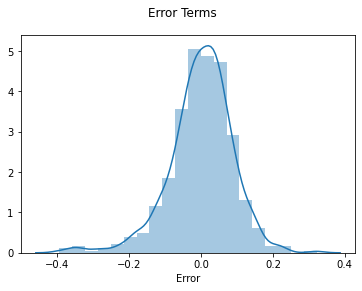

In [50]:
# Plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Error')
plt.show()

Error is seen to follow normal distribution.

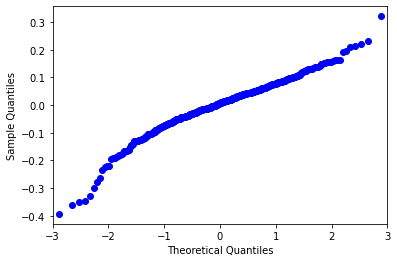

In [51]:
# Residuals following a normal distribution is cross-verified by QQ plot
import statsmodels.api as sm
residuals = lr5.resid
sm.qqplot(residuals)
plt.show()

##### Verifying Homoscedasticity

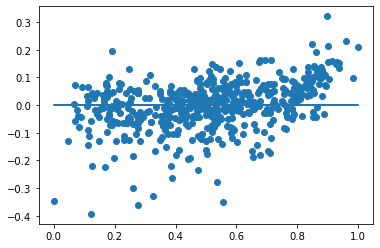

In [52]:
plt.scatter(y_train, residuals)
plt.plot(y_train, [0]*len(y_train))
plt.show()

* Homoscedasticity means a constant error, i.e. constant deviation of the points from the zero-line. 
* There is no visible pattern in residual values, thus homoscedacity is well preserved

##### Independence of residuals

To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. 
* 0 – 2: positive auto-correlation
* 2 – 4: negative auto-correlation)

In [53]:
print('The Durbin-Watson value for Final Model lr5 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_cnt)),4))

The Durbin-Watson value for Final Model lr5 is 2.0877


* There is almost no autocorrelation

##### All independent variable are uncorrelated with error term

<Figure size 1800x1440 with 0 Axes>

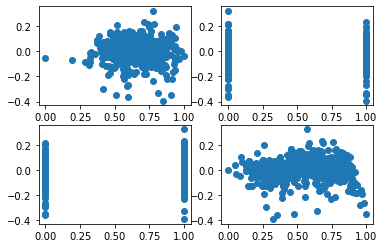

In [54]:
plt.figure(figsize=(25, 20))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_train_new5['hum'], residuals)
ax2.scatter(X_train_new5['workingday'], residuals)
ax3.scatter(X_train_new5['weathersit_misty'], residuals)
ax4.scatter(X_train_new5['temp'], residuals)
plt.show()

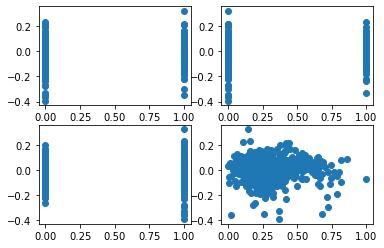

In [55]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_train_new5['weekday_sat'], residuals)
ax2.scatter(X_train_new5['season_summer'], residuals)
ax3.scatter(X_train_new5['yr'], residuals)
ax4.scatter(X_train_new5['windspeed'], residuals)
plt.show()

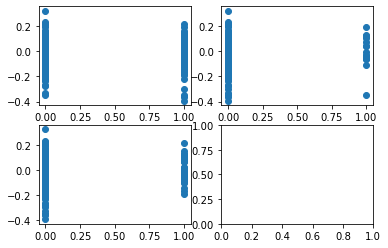

In [56]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_train_new5['season_winter'], residuals)
ax2.scatter(X_train_new5['weathersit_light_snow'], residuals)
ax3.scatter(X_train_new5['mnth_sept'], residuals)
plt.show()

* No correlation observed between any of the independent variables and the error term

### Making Predictions using Final Model

Now that we have fitted the model and verified the assumptions, it's time to make predictions using the final model (lr5)

##### Rescaling test featutes

In [57]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and Y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
#Selecting the variables that were part of final model.
col1 = X_train_new5.columns
col1

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_light_snow', 'weathersit_misty'],
      dtype='object')

In [61]:
X_test=X_test[['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_light_snow', 'weathersit_misty']]

In [62]:
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   season_summer          219 non-null    uint8  
 7   season_winter          219 non-null    uint8  
 8   mnth_sept              219 non-null    uint8  
 9   weekday_sat            219 non-null    uint8  
 10  weathersit_light_snow  219 non-null    uint8  
 11  weathersit_misty       219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [63]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

### Model Evaluation

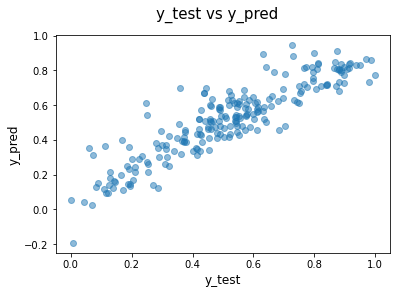

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 15) 
plt.xlabel('y_test', fontsize = 12)             
plt.ylabel('y_pred', fontsize = 12)  
plt.show()

#### Plot Test vs Predicted test values

In [65]:
# Function to plot Actual vs Predicted

def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)           
    plt.xlabel('Index', fontsize=18)                            
    plt.ylabel('Counts', fontsize=16)  

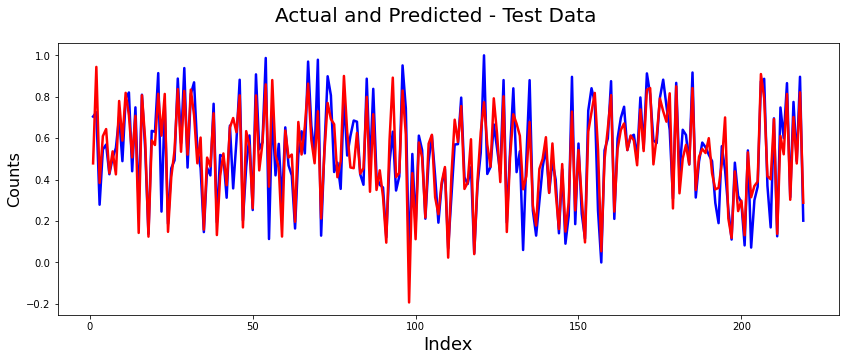

In [66]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test, y_pred, len(y_test)+1,'Test Data')

In [67]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)               
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Counts - Predicted Counts', fontsize=16)    

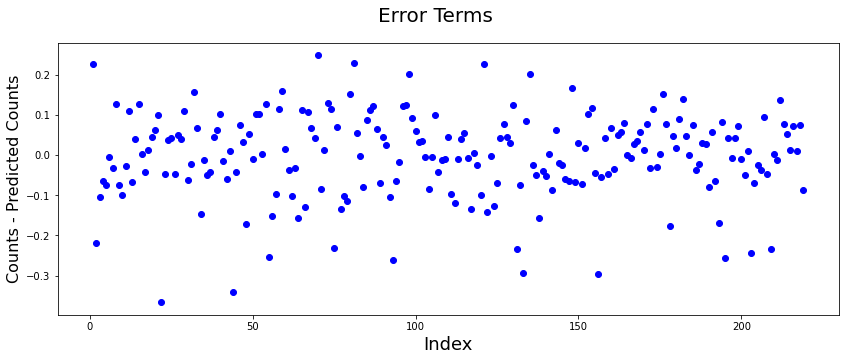

In [68]:
#Plot error terms for test data
plot_err_terms(y_test,y_pred)

The error terms are randomly distributed and there is no pattern which means the output is explained well by the model.

#### R2 Value Calculation for Test dataset

In [69]:
r2 = r2_score(y_test, y_pred)
r2

0.8058680916848985

In [70]:
#### Adjusted R2 Value Calculation for Test dataset

In [71]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7955519033203279

#### Model Train & Test R2 Statsitics Comparison

* R2 value of Train Dataset  **0.842**
* R2 value of Test Dataset   **0.805**

* Adjusted R2 value of Train Dataset  **0.838**
* Adjusted R2 value of Test Dataset   **0.795**

It seems to be a good model that can generalize various datasets.

#### Calculating RMSE and MAE for the selected Model

In [72]:
from math import sqrt
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1049

In [73]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0801

The RMSE value for the test dataset based on final model is 0.1049 and MAE is 0.080, which indicates that the model is good.

In [74]:
# Checking parameters of final model 
round(lr5.params,4)

const                    0.1698
yr                       0.2294
workingday               0.0536
temp                     0.5709
hum                     -0.1613
windspeed               -0.1861
season_summer            0.0899
season_winter            0.1407
mnth_sept                0.1025
weekday_sat              0.0630
weathersit_light_snow   -0.2439
weathersit_misty        -0.0553
dtype: float64

### Conclusion

We can see that the equation for best fitted line is:

**cnt= 0.1698  +  0.2294$*$yr  +  0.0536$*$workingday  +  0.5709$*$temp  -  0.1613$*$hum  -  0.1861$*$windspeed  +  0.0899$*$season_summer  +  0.1407$*$season_winter  +  0.1025$*$mnth_sept  +  0.0630$*$weekday_sat  -  0.2439$*$weathersit_light_snow  -  0.0553$*$weathersit_misty** 

As per the final Model, the top predictor variables that influences the bike booking are: 
* **Temperature (temp)** - with coefficient value of ‘0.5709’  
* **Weather Situation (weathersit_light_snow)** - with coefficient value of ‘-0.2439’ 
* **Year (yr)** - with coefficient value of ‘0.2294’ 
* **windspeed** - with coefficient value of ‘-0.1861’ 
* **hum** - with coefficient value of ‘-0.1613’
* **season_winter** - with coefficient value of ‘0.1407’
* **mnth_sept** - with coefficient value of ‘0.1025’

**SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING.**